In [26]:
import pandas as pd
import random
import shutil
import os
import time
from hashlib import sha256
from sklearn.utils import shuffle
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read data
df = pd.read_csv('security-data.csv')

#Column names
headers = [ 'hashed_ids', 'age', 'bmi_per_age_gender', 'bmi_per_age_gender_time',
            'body_height', 'body_height_time', 'body_temperature',
            'body_temperature_time', 'body_weight', 'body_weight_time', 'country',
            'diastolic_blood_pressure', 'diastolic_blood_pressure_time',
            'disease_time', 'erythrocytes_in_blood', 'erythrocytes_in_blood_time',
            'gender', 'heart_rate', 'heart_rate_time', 'heboglobin_time',
            'hemoglobin', 'leukocytes', 'leukocytes_time', 'respiratory_rate',
            'respiratory_rate_time', 'state', 'systolic_blood_pressure',
            'systolic_blood_pressure_time'  ]
df.rename( columns={'Unnamed: 0':'hashed_ids'}, inplace=True)

#ID numbers
id_nums = random.sample(range(10000000000, 99999999999), df.shape[0])
hashed_ids = [ sha256(str(i).encode('utf-8')).hexdigest() for i in id_nums ]
test = [id_nums[0], hashed_ids[0]]
df.iloc[:,0] = hashed_ids

df.head()


,hashed_ids,age,bmi_per_age_gender,bmi_per_age_gender_time,body_height,body_height_time,body_temperature,body_temperature_time,body_weight,body_weight_time,...,heart_rate_time,heboglobin_time,hemoglobin,leukocytes,leukocytes_time,respiratory_rate,respiratory_rate_time,state,systolic_blood_pressure,systolic_blood_pressure_time
0,7a432b5920e9ae8b2885a6e4112c8074d343154789492f...,73,0.000,0,154.5,2019,0.000,0,65.9,2019,...,2019,2018,13.173,10.238,2018,15.0,2019,Massachusetts,155,2019
1,2788e9ed8245c215af7cda15197a58e3c18b974f7237e2...,-2004,0.000,0,0.0,0,37.776,2011,0.0,0,...,0,0,0.000,0.000,0,0.0,0,Massachusetts,0,0
2,c36dc092535c9011f258041c16d0f2acecf055d071669a...,5,71.555,2018,104.4,2018,38.163,2015,17.6,2018,...,2018,2013,16.372,5.051,2013,12.0,2018,Massachusetts,116,2018
3,80844313c324e719cb6200d1f5f5634e30175f93b17df8...,48,0.000,0,182.3,2017,0.000,0,101.2,2017,...,2017,2015,16.426,10.433,2015,13.0,2017,Massachusetts,125,2017
4,ce9b2f75ae93fa77a0aec60d5ec8a72719344d87e1f562...,44,0.000,0,169.7,2016,0.000,0,87.2,2016,...,2016,0,0.000,0.000,0,14.0,2016,Massachusetts,126,2016


In [3]:
def parse_data(data, splitAmount):
    # ID column
    parsed = [data.loc[:,headers[0]],]
    i=1
    while i < len(headers):
        # Other columns
        parsed.append(data.loc[:,headers[i:i+splitAmount]])
        i+=splitAmount

    return parsed


def save_data(data, splitAmount):
    # Parse
    parsed = parse_data(data, splitAmount) 

    # Create Folder
    folder = str(splitAmount)
    if os.path.exists(folder):
        shutil.rmtree(folder)
    os.mkdir(folder)
    
    # Save all
    parsed[0].to_csv(folder+'/rep-main.csv', index=False)
    i=1
    for p in parsed[1:]:
        p.insert(loc=0, column='hashed_ids', value=hashed_ids)
        p = shuffle(p)
        p.to_csv(folder+'/rep-'+str(i)+'.csv', index=False)
        print('Saved to '+folder+'/rep-'+str(i)+'.csv')
        i+=1


In [4]:
save_data(df, 5) 

Saved to 5/rep-1.csv
Saved to 5/rep-2.csv
Saved to 5/rep-3.csv
Saved to 5/rep-4.csv
Saved to 5/rep-5.csv
Saved to 5/rep-6.csv


In [69]:
def measure_save_time(data, splitAmount):
    start = time.time()
    save_data(data, splitAmount)
    end = time.time()
    print("Elapsed time: "+str(end-start)+" seconds")
    return end - start

t = measure_save_time(df, 4)

Saved to 4/rep-1.csv
Saved to 4/rep-2.csv
Saved to 4/rep-3.csv
Saved to 4/rep-4.csv
Saved to 4/rep-5.csv
Saved to 4/rep-6.csv
Saved to 4/rep-7.csv
Elapsed time: 0.43757104873657227 seconds


In [6]:
'''
-sentetik data (oğuzhan)

-dataları bölme (mustafa)
--implementasyon

-testler ve grafik (evren)
--data miktarı değişecek
--split miktarı değişecek

-verileri geri birleştirme (hakan)
--id seçip, split değişecek
'''

'\n-sentetik data (oğuzhan)\n\n-dataları bölme (mustafa)\n--implementasyon\n\n-testler ve grafik (evren)\n--data miktarı değişecek\n--split miktarı değişecek\n\n-verileri geri birleştirme (hakan)\n--id seçip, split değişecek\n'

In [29]:
def collect_data(id, splitAmount):
    hashed_id = sha256(str(id).encode('utf-8')).hexdigest()
    print(id, hashed_id)
    # Read Main
    main = pd.read_csv(str(splitAmount)+'/rep-main.csv')
    data = main[main["hashed_ids"] == hashed_id]
    # Read other repositories
    for i in range(1, math.ceil(27.0/splitAmount)+1):
        repo = pd.read_csv(str(splitAmount)+'/rep-'+str(i)+'.csv')
        print('Read from '+str(splitAmount)+'/rep-'+str(i)+'.csv')
        found = repo[repo["hashed_ids"] == hashed_id]
        data = pd.merge(data, found, on=["hashed_ids"])
    
    return data  


data = collect_data(test[0], 5)

19784443220 7a432b5920e9ae8b2885a6e4112c8074d343154789492f0963d2a96e92637737
Read from 5/rep-1.csv
Read from 5/rep-2.csv
Read from 5/rep-3.csv
Read from 5/rep-4.csv
Read from 5/rep-5.csv
Read from 5/rep-6.csv


In [19]:
print("Collected: ")
data.head()

Collected: 


,hashed_ids,age,bmi_per_age_gender,bmi_per_age_gender_time,body_height,body_height_time,body_temperature,body_temperature_time,body_weight,body_weight_time,...,heart_rate_time,heboglobin_time,hemoglobin,leukocytes,leukocytes_time,respiratory_rate,respiratory_rate_time,state,systolic_blood_pressure,systolic_blood_pressure_time
0,7a432b5920e9ae8b2885a6e4112c8074d343154789492f...,73,0.0,0,154.5,2019,0.0,0,65.9,2019,...,2019,2018,13.173,10.238,2018,15.0,2019,Massachusetts,155,2019


In [20]:
print("Original: ")
df[df["hashed_ids"] == test[1]].head()

Original: 


,hashed_ids,age,bmi_per_age_gender,bmi_per_age_gender_time,body_height,body_height_time,body_temperature,body_temperature_time,body_weight,body_weight_time,...,heart_rate_time,heboglobin_time,hemoglobin,leukocytes,leukocytes_time,respiratory_rate,respiratory_rate_time,state,systolic_blood_pressure,systolic_blood_pressure_time
0,7a432b5920e9ae8b2885a6e4112c8074d343154789492f...,73,0.0,0,154.5,2019,0.0,0,65.9,2019,...,2019,2018,13.173,10.238,2018,15.0,2019,Massachusetts,155,2019


In [30]:
def measure_collect_time(data, splitAmount):
    save_data(data, splitAmount)
    start = time.time()
    collect_data(test[0], splitAmount)
    end = time.time()
    print("Elapsed time: "+str(end-start)+" seconds")
    return end - start

t = measure_collect_time(df, 27)

Saved to 27/rep-1.csv
19784443220 7a432b5920e9ae8b2885a6e4112c8074d343154789492f0963d2a96e92637737
Read from 27/rep-1.csv
Elapsed time: 0.0688624382019043 seconds


In [67]:
times = []
splits = range(1, 28)
for i in splits:
    times.append(measure_collect_time(df, i))
    # Clean directory
    folder = str(i)
    if os.path.exists(folder):
        shutil.rmtree(folder)

Saved to 1/rep-1.csv
Saved to 1/rep-2.csv
Saved to 1/rep-3.csv
Saved to 1/rep-4.csv
Saved to 1/rep-5.csv
Saved to 1/rep-6.csv
Saved to 1/rep-7.csv
Saved to 1/rep-8.csv
Saved to 1/rep-9.csv
Saved to 1/rep-10.csv
Saved to 1/rep-11.csv
Saved to 1/rep-12.csv
Saved to 1/rep-13.csv
Saved to 1/rep-14.csv
Saved to 1/rep-15.csv
Saved to 1/rep-16.csv
Saved to 1/rep-17.csv
Saved to 1/rep-18.csv
Saved to 1/rep-19.csv
Saved to 1/rep-20.csv
Saved to 1/rep-21.csv
Saved to 1/rep-22.csv
Saved to 1/rep-23.csv
Saved to 1/rep-24.csv
Saved to 1/rep-25.csv
Saved to 1/rep-26.csv
Saved to 1/rep-27.csv
19784443220 7a432b5920e9ae8b2885a6e4112c8074d343154789492f0963d2a96e92637737
Read from 1/rep-1.csv
Read from 1/rep-2.csv
Read from 1/rep-3.csv
Read from 1/rep-4.csv
Read from 1/rep-5.csv
Read from 1/rep-6.csv
Read from 1/rep-7.csv
Read from 1/rep-8.csv
Read from 1/rep-9.csv
Read from 1/rep-10.csv
Read from 1/rep-11.csv
Read from 1/rep-12.csv
Read from 1/rep-13.csv
Read from 1/rep-14.csv
Read from 1/rep-15.csv
Re

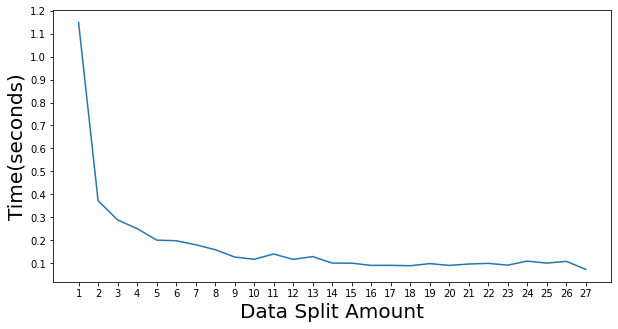

In [68]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel('Data Split Amount', size = 20)
ax.set_xticks(splits)
ax.set_ylabel('Time(seconds)', size = 20)
ax.set_yticks(np.arange(0, times[0]+1, 0.1))

# z = np.polyfit(splits, times, 4)
# p = np.poly1d(z)
# plt.plot(splits, p(splits),"r--")

ax.plot(splits, times)